# Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importar Data

In [2]:
store_info_df = pd.read_csv("store.csv")
# StoreType: categoría que indica el tipo de tienda (a, b, c, d)
# Assortment:  a = básico, b = extra, c = extedido
# CompetitionDistance (en metros): distancia a la tienda de la competencia más cercana
# CompetitionOpenSince [Mes/Año]:  fecha en que abrió la competencia
# Promo2: Promo2 es una promoción continuada y consecutiva en algunas tiendas (0 = la tienda no participa, 1 = la tienda participa)
# Promo2Since [Año/Semana]: fecha en la que la tienda empieza a participar en la Promo2
# PromoInterval: describe los intervalos consecutivos donde la Promo2 empieza, indicando los meses en los que empieza la misma. P.e. "Feb,May,Aug,Nov" significa que cada nueva ronda de promoción empieza en Febrero, Mayo, Agosto, Noviembre de cualquier año de esa tienda


sales_train_df = pd.read_csv("train.csv", low_memory=False)
# Id:  ID de transacción (combinación de la tienda y la fecha)
# Store: identificador único de la tienda
# Sales: ventas diarias, esta es la variable objetivo
# Customers: número de clientes de un día dado
# Open: Booleano para indicar si la tienda estaba abierta o cerrada (0 = cerrada, 1 = abierta)
# Promo: describe si la tienda tenía algún tipo de promoción ese día o no
# StateHoliday: indica si el día era festivo o no (a = vacaciones públicas, b = vacaciones de Pascua holiday, c = Navidades, 0 = No era festivo)
# SchoolHoliday: indica si (Store, Date) se ve afectado por el cierre de las escuelas públicas

# Fuente original de los datos: https://www.kaggle.com/c/rossmann-store-sales/data

In [3]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [4]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [5]:
store_info_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


# Entendiendo la data

#### sales_train_df

<AxesSubplot:>

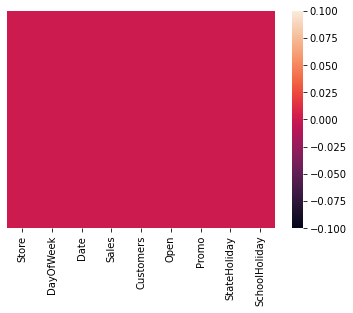

In [9]:
#revisamos si no hay datos nulos visualmente
#previamente ya lo vimos con sales_train_df.info()
sns.heatmap(data=sales_train_df.isnull(), yticklabels=False)

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

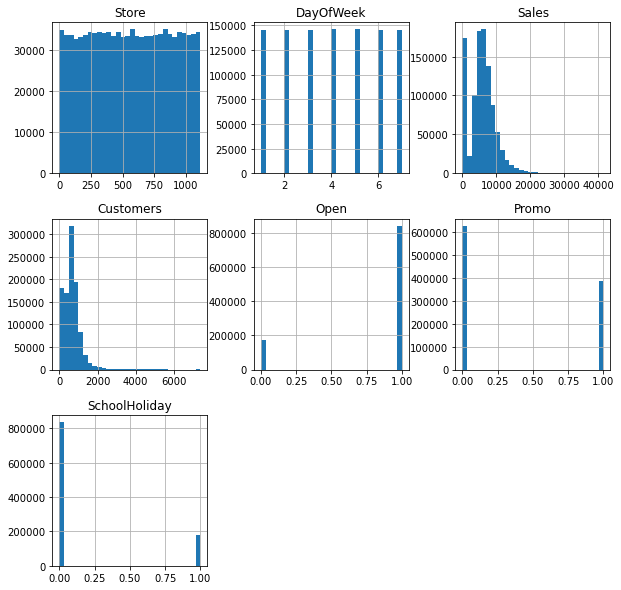

In [10]:
#Creamos un histograma para analizar las variables numericas
sales_train_df.hist(bins=30,figsize=(10,10))
#store no me sirve de nada
#DayOfWeek no me sirve de mucho, pero veo que hay misma cantidad por días.
#Sales: inferioers a los 10k, y tiene una longtail
#Customers: longtail, en prom 1k
#open: Las tiendas cierran algunos días de la semana, y se verá más adelante.
#Promo: no todas las tiendas teninan promociones activas
#Schoolholiday: no relevante

In [11]:
#Entendiendo que si la tienda esta cerrada, no genera ventas. Por lo tanto, si deseo predecir la demanda de una tienda cerrada, es 0
sales_train_df.groupby(["Open"]).sum()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
Open,,,,,,
0,96511898,1094583,0,0,11184,18264
1,471527846,2972565,5873180623,644041755,376896,163457


In [12]:
sales_train_df.groupby(["StateHoliday","SchoolHoliday"]).count()
#vemos que a pesar de ser feriado, habian tiendas que sí abren y otras que no.

Store  DayOfWeek    Date   Sales  Customers  \
StateHoliday SchoolHoliday                                                 
0            0              819949     819949  819949  819949     819949   
             1              166210     166210  166210  166210     166210   
a            0               15055      15055   15055   15055      15055   
             1                5205       5205    5205    5205       5205   
b            0                 484        484     484     484        484   
             1                6206       6206    6206    6206       6206   
c            1                4100       4100    4100    4100       4100   

                              Open   Promo  
StateHoliday SchoolHoliday                  
0            0              819949  819949  
             1              166210  166210  
a            0               15055   15055  
             1                5205    5205  
b            0                 484     484  
             1                6206    6206  
c            1                4100    4100

In [13]:
#Solo me voy a quedar con las tiendas abiertas
sales_train_df = sales_train_df[sales_train_df["Open"]==1]
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [14]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.0,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,1.0,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.0,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000


In [15]:
sales_train_df.groupby(["DayOfWeek"]).sum()

,Store,Sales,Customers,Open,Promo,SchoolHoliday
DayOfWeek,,,,,,
1,76816131,1130203012,117675012,137560,77243,30919
2,80384621,1020411930,110848063,143961,77118,35424
3,79240077,954962863,105117642,141936,76257,32363
4,75187693,911177709,101732938,134644,74123,30181
5,77403937,980555941,108384820,138640,72155,31769
6,80433436,846317735,95103854,144058,0,2719
7,2061951,29551433,5179426,3593,0,82


In [16]:
sales_train_df[sales_train_df["DayOfWeek"]==1]["Sales"].sum()

1130203012

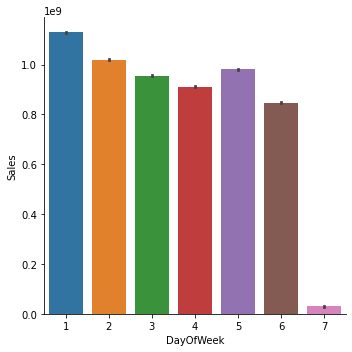

In [17]:
#vemos que no existen promociones el fines de semana, 
sns.catplot(data=sales_train_df, kind="bar", x="DayOfWeek", y="Sales", estimator=sum)

In [18]:
#vemos que las tiendas tienen diferentes dias libres ya que el conteo no es siempre el mismo por días.
sales_train_df.groupby(["DayOfWeek"]).count()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
DayOfWeek,,,,,,,,
1,137560,137560,137560,137560,137560,137560,137560,137560
2,143961,143961,143961,143961,143961,143961,143961,143961
3,141936,141936,141936,141936,141936,141936,141936,141936
4,134644,134644,134644,134644,134644,134644,134644,134644
5,138640,138640,138640,138640,138640,138640,138640,138640
6,144058,144058,144058,144058,144058,144058,144058,144058
7,3593,3593,3593,3593,3593,3593,3593,3593


#### store_info_df

<AxesSubplot:>

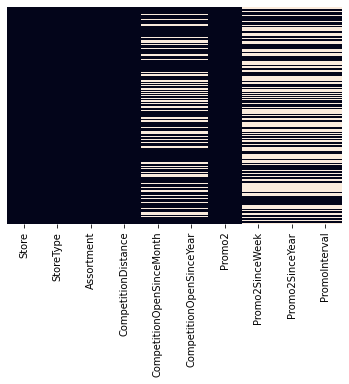

In [19]:
#revisamos si no hay datos nulos visualmente
#previamente ya lo vimos con sales_train_df.info()
sns.heatmap(data=store_info_df.isnull(), yticklabels=False, cbar=False)

##### Tratando los valores vacios

In [20]:
#CompetitionDistance, podemos reemplazadorlo por la media
store_info_df["CompetitionDistance"].fillna(store_info_df["CompetitionDistance"].mean(),inplace=True)
#CompetitionOpenSinceMonth, CompetitionOpenSinceYear -> son datos que no tenemos, asi que pondremos 0 ya que son bastantes y no podemos eliminarlos
#Promo2DinceWeek,Promo2DinceYear,PromoInterval-> son datos que obedencen al campo Promo2, por lo tanto si no hay promo, estos no tienen sentido -> los reemplazamos con 0
delete_columns = ["CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2SinceWeek","Promo2SinceYear","PromoInterval"]
for cols in delete_columns:
    store_info_df[cols].fillna(0,inplace=True)
store_info_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


<AxesSubplot:>

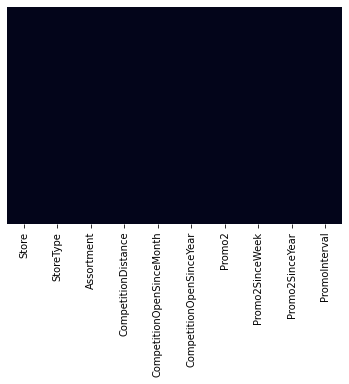

In [21]:
sns.heatmap(data=store_info_df.isnull(), yticklabels=False, cbar=False)

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

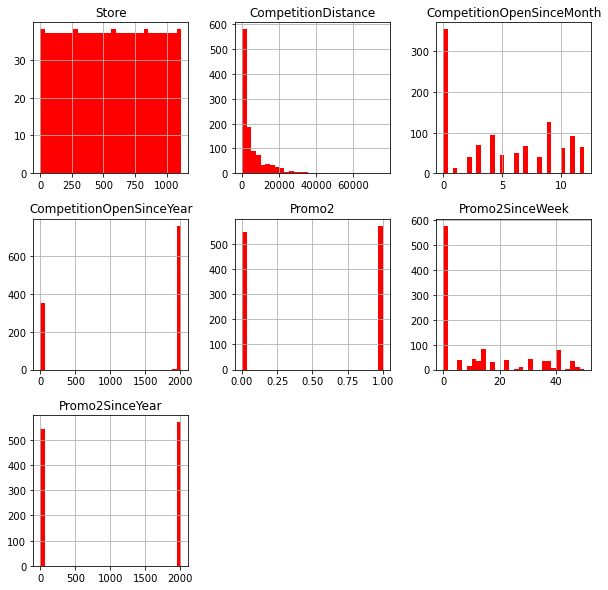

In [22]:
store_info_df.hist(bins=30,figsize=(10,10),color="r")

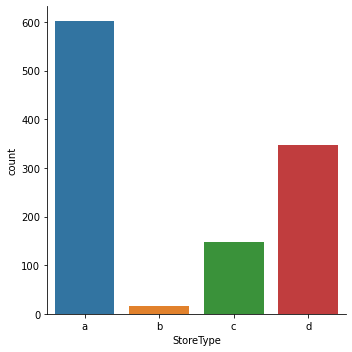

In [23]:
sns.catplot(data=store_info_df,x="StoreType",kind="count",order=["a","b","c","d"])

#### Unir ambos datasets

In [24]:
sales_train_all_df = pd.merge(sales_train_df, store_info_df, on="Store",how="inner")
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,1,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,1,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,1,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


In [25]:
sales_train_all_df["Date_Year"] = pd.DatetimeIndex(sales_train_all_df["Date"]).year
sales_train_all_df["Date_Month"] = pd.DatetimeIndex(sales_train_all_df["Date"]).month
sales_train_all_df["Date_Day"] =pd.DatetimeIndex(sales_train_all_df["Date"]).day

In [26]:
sales_train_all_df["Date_Year"]

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
844387    2013
844388    2013
844389    2013
844390    2013
844391    2013
Name: Date_Year, Length: 844392, dtype: int64

In [27]:
sales_train_all_df.drop(["Open"],axis=1,inplace=True)

<AxesSubplot:>

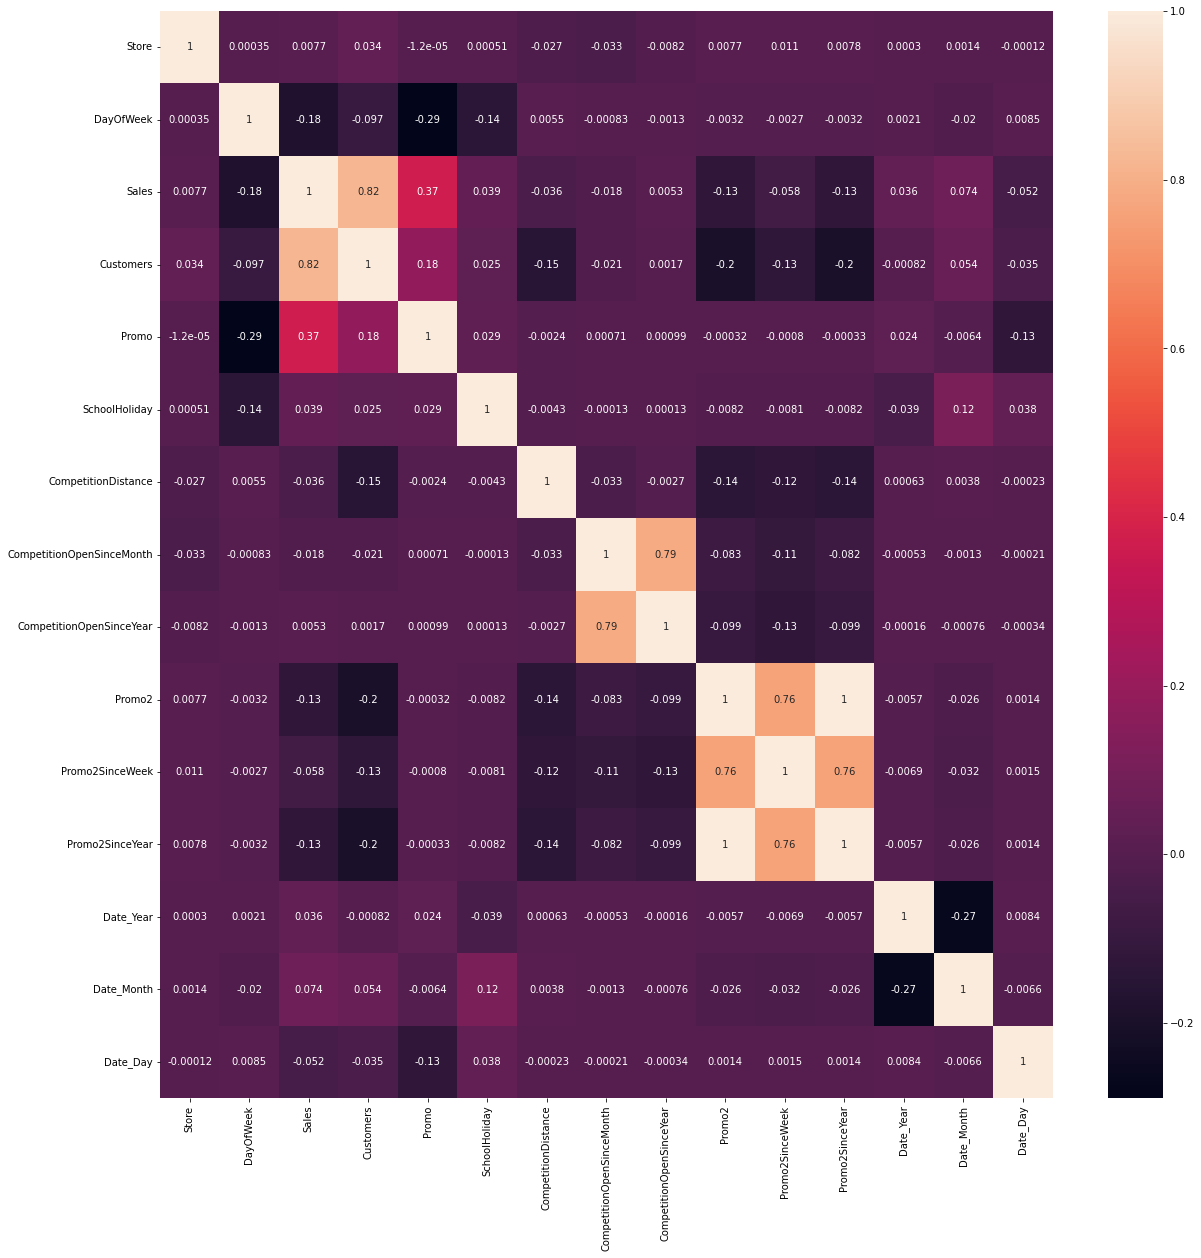

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(sales_train_all_df.corr(),annot=True)

# Aplicando Modelo FB Prophet

In [29]:
from prophet import Prophet

C:\Users\wongp\Anaconda3\envs\DataScience\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [30]:
def sales_predictions(Store_ID, sales_df, periods):
    sales_df = sales_df[sales_df["Store"] == Store_ID]
    sales_df = sales_df[["Date","Sales"]].rename(columns={"Date":"ds","Sales":"y"})
    sales_df = sales_df.sort_values("ds")
    
    model = Prophet()
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure = model.plot(forecast,xlabel = "Fecha", ylabel="Ventas")
    figure2 = model.plot_components(forecast)

23:44:34 - cmdstanpy - INFO - Chain [1] start processing
23:44:34 - cmdstanpy - INFO - Chain [1] done processing


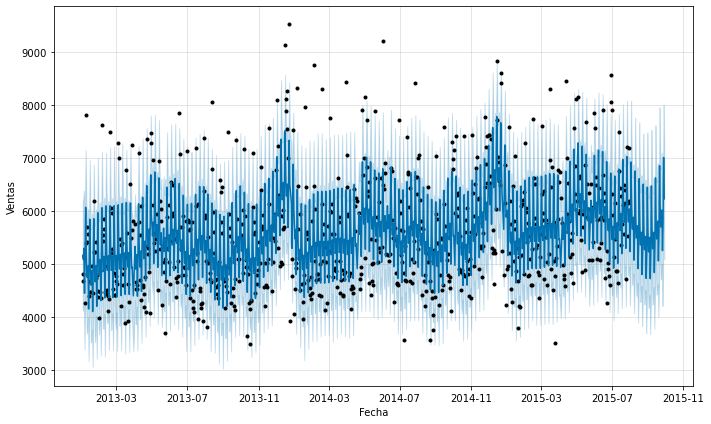

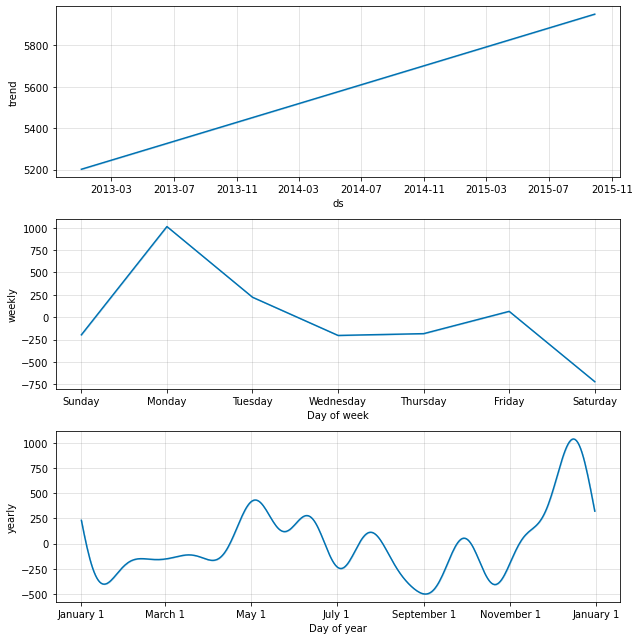

In [31]:
sales_predictions(10, sales_train_all_df,60)

In [49]:
def sales_predictions(Store_ID, sales_df, periods, holidays):
    sales_df = sales_df[sales_df["Store"] == Store_ID]
    sales_df = sales_df[["Date","Sales"]].rename(columns={"Date":"ds","Sales":"y"})
    sales_df = sales_df.sort_values("ds")
    
    model = Prophet(holidays=holidays)
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure = model.plot(forecast,xlabel = "Fecha", ylabel="Ventas")
    figure2 = model.plot_components(forecast)

In [38]:
school_holidays  = sales_train_all_df[sales_train_all_df["SchoolHoliday"]==1].loc[:,"Date"].values
school_holidays = np.unique(school_holidays)

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [41]:
state_holidays  = sales_train_all_df[(sales_train_all_df["StateHoliday"]=="a")|(sales_train_all_df["StateHoliday"]=="b")|(sales_train_all_df["StateHoliday"]=="c")].loc[:,"Date"].values
state_holidays = np.unique(state_holidays)
state_holidays

array(['2013-01-01', '2013-01-06', '2013-03-29', '2013-04-01',
       '2013-05-01', '2013-05-09', '2013-05-20', '2013-05-30',
       '2013-08-15', '2013-10-03', '2013-10-31', '2013-11-01',
       '2013-12-25', '2013-12-26', '2014-01-01', '2014-01-06',
       '2014-04-18', '2014-04-21', '2014-05-01', '2014-05-29',
       '2014-06-09', '2014-06-19', '2014-10-03', '2014-10-31',
       '2014-11-01', '2014-12-25', '2014-12-26', '2015-01-01',
       '2015-01-06', '2015-04-03', '2015-04-06', '2015-05-01',
       '2015-05-14', '2015-05-25', '2015-06-04'], dtype=object)

In [42]:
school_holidays = pd.DataFrame({"ds":pd.to_datetime(school_holidays),"holiday":"school_holiday"})
school_holidays

,ds,holiday
0,2013-01-01,school_holiday
1,2013-01-02,school_holiday
2,2013-01-03,school_holiday
3,2013-01-04,school_holiday
4,2013-01-05,school_holiday
...,...,...
472,2015-07-27,school_holiday
473,2015-07-28,school_holiday
474,2015-07-29,school_holiday
475,2015-07-30,school_holiday


In [43]:
state_holidays = pd.DataFrame({"ds":pd.to_datetime(state_holidays),"holiday":"state_holiday"})
state_holidays

,ds,holiday
0,2013-01-01,state_holiday
1,2013-01-06,state_holiday
2,2013-03-29,state_holiday
3,2013-04-01,state_holiday
4,2013-05-01,state_holiday
5,2013-05-09,state_holiday
6,2013-05-20,state_holiday
7,2013-05-30,state_holiday
8,2013-08-15,state_holiday
9,2013-10-03,state_holiday


In [45]:
school_state_holidays = pd.concat([school_holidays,state_holidays],axis=0)
school_state_holidays

,ds,holiday
0,2013-01-01,school_holiday
1,2013-01-02,school_holiday
2,2013-01-03,school_holiday
3,2013-01-04,school_holiday
4,2013-01-05,school_holiday
...,...,...
30,2015-04-06,state_holiday
31,2015-05-01,state_holiday
32,2015-05-14,state_holiday
33,2015-05-25,state_holiday


00:15:10 - cmdstanpy - INFO - Chain [1] start processing
00:15:10 - cmdstanpy - INFO - Chain [1] done processing


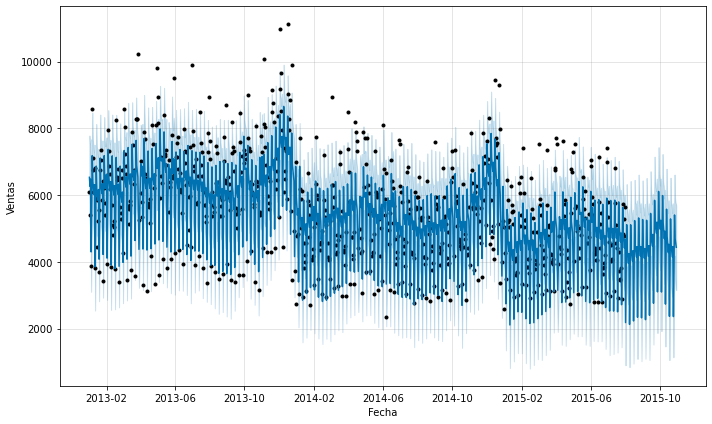

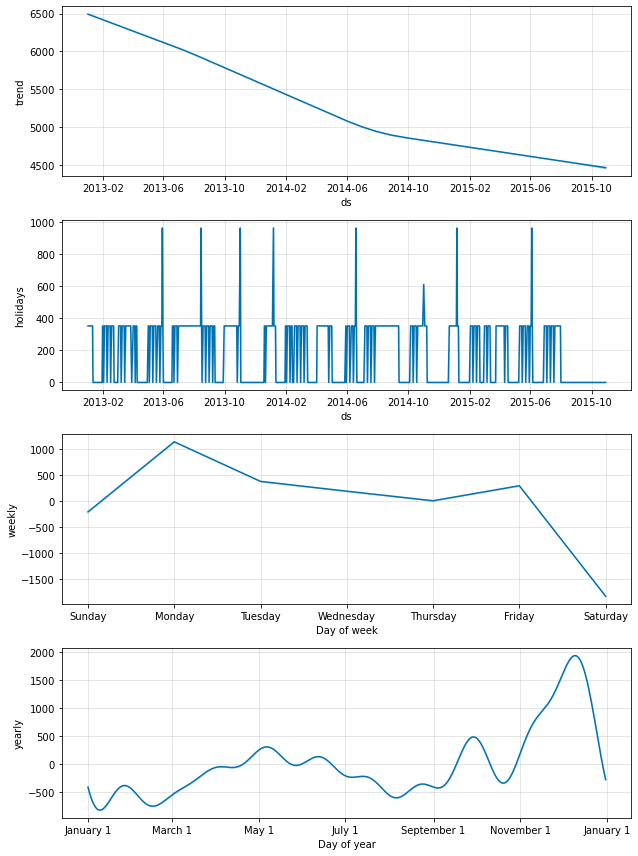

In [50]:
sales_predictions(6, sales_train_all_df,90,school_state_holidays)